# Planar data classification with one hidden layer

Welcome to your week 3 programming assignment. It's time to build your first neural network, which will have a hidden layer. You will see a big difference between this model and the one you implemented using logistic regression. 

**You will learn how to:**
- Implement a 2-class classification neural network with a single hidden layer
- Use units with a non-linear activation function, such as tanh 
- Compute the cross entropy loss 
- Implement forward and backward propagation

## 1 - Packages ##

Let's first import all the packages that you will need during this assignment.
- [numpy](https://www.numpy.org/) is the fundamental package for scientific computing with Python.
- [sklearn](http://scikit-learn.org/stable/) provides simple and efficient tools for data mining and data analysis. 
- [matplotlib](http://matplotlib.org) is a library for plotting graphs in Python.
- testCases provides some test examples to assess the correctness of your functions
- planar_utils provide various useful functions used in this assignment

In [36]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
#from testCases_v2 import *
import sklearn
import sklearn.datasets
import sklearn.linear_model
#from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

%matplotlib inline

np.random.seed(1) # set a seed so that the results are consistent

## 2 - Dataset ##

First, let's get the dataset you will work on. The following code will load a "flower" 2-class dataset into variables `X` and `Y`.

In [59]:
def load_planar_dataset():
    np.random.seed(1)
    m = 400 # number of examples
    N = int(m/2) # number of points per class
    D = 2 # dimensionality
    X = np.zeros((m,D)) # data matrix where each row is a single example
    Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
    a = 4 # maximum ray of the flower

    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j
        
    X = X.T
    Y = Y.T

    return X, Y

0
1
[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]
[[1 4]
 [2 5]
 [3 6]]
len(ix):  200
np.min(t):  -0.295426765369805
np.max(t):  3.252036074642002
t.shape:  (200,)


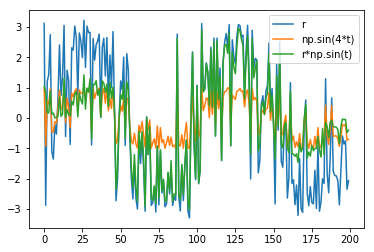

In [75]:
m = 400 # number of examples
N = int(m/2) # number of points per class
D = 2 # dimensionality
X = np.zeros((m,D)) # data matrix where each row is a single example
Y = np.zeros((m,1), dtype='uint8') # labels vector (0 for red, 1 for blue)
a = 3 # maximum ray of the flower

[print(i) for i in range(2)]

#print(np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2)
print(np.linspace(0,1, 10))
print(np.c_[np.array([1,2,3]), np.array([4,5,6])])
j=0
ix = range(N*j,N*(j+1)); print('len(ix): ', len(ix))
t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2; print('np.min(t): ', np.min(t)); print('np.max(t): ', np.max(t)); print('t.shape: ', t.shape) # theta
r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
plt.plot(np.arange(r.shape[0]), r, label = 'r')
plt.plot(np.arange(r.shape[0]), np.sin(4*t), label = 'np.sin(4*t)')
plt.plot(np.arange(r.shape[0]), r*np.sin(t), label = 'r*np.sin(t)')
plt.legend()
Y[ix] = j

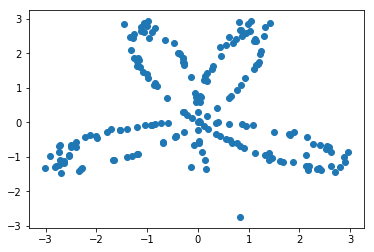

In [77]:
plt.scatter(r*np.sin(t), r*np.cos(t))

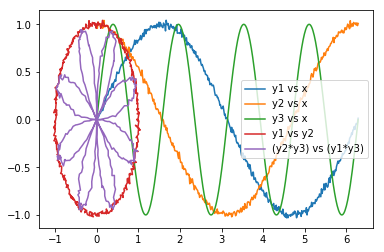

In [96]:
x = np.linspace(0, 2 * np.pi, 400)
y1 = np.sin(x) + np.random.randn(len(x)) * 0.02
y2 = np.cos(x) + np.random.randn(len(x)) * 0.02
y3 = np.sin(4*x)
plt.plot(x,y1, label = 'y1 vs x')
plt.plot(x,y2, label = 'y2 vs x')
plt.plot(x,y3, label = 'y3 vs x')
plt.plot(y1,y2, label = 'y1 vs y2')
plt.plot(y1*y3,y2*y3, label = '(y2*y3) vs (y1*y3)')
plt.legend()

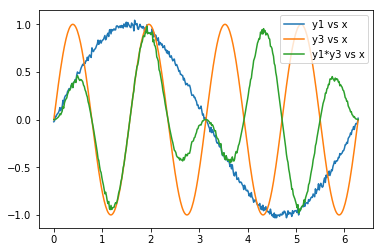

In [97]:
plt.plot(x,y1, label = 'y1 vs x')
plt.plot(x,y3, label = 'y3 vs x')
plt.plot(x,y1*y3, label = 'y1*y3 vs x')
plt.legend()


### Goal

Visualize the dataset using matplotlib. The data looks like a "flower" with some red (label y=0) and some blue (y=1) points. Your goal is to build a model to fit this data. In other words, we want the classifier to define regions as either red or blue.

In [101]:
X, Y = load_planar_dataset()

print(np.min(X[1,:])); print(np.max(X[1,:]))
print(np.min(X[0,:])); print(np.max(X[0,:]))

-4.035124003739587
4.037643470481511
-4.211898112302497
4.078165875644617


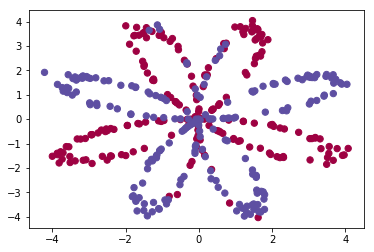

In [102]:
plt.scatter(X[0,:], X[1,:], c = Y, s = 40, cmap = plt.cm.Spectral)
#plt.scatter(np.arange(X.shape[1]), X[1,:], c = Y, s = 40)
#plt.scatter(np.arange(X.shape[1]), X[0,:], c = Y, s = 40)
plt.show()

You have:
    - a numpy-array (matrix) X that contains your features (x1, x2)
    - a numpy-array (vector) Y that contains your labels (red:0, blue:1).

Lets first get a better sense of what our data is like. 

**Exercise**: How many training examples do you have? In addition, what is the `shape` of the variables `X` and `Y`? 

**Hint**: How do you get the shape of a numpy array? [(help)](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.shape.html)

In [103]:
### START CODE HERE ### (≈ 3 lines of code)
shape_X = X.shape
shape_Y = Y.shape
m = shape_X[1]  # training set size
### END CODE HERE ###

print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('I have m = %d training examples!' % (m))

The shape of X is: (2, 400)
The shape of Y is: (1, 400)
I have m = 400 training examples!


**Expected Output**:
       
<table style="width:20%">
  
  <tr>
    <td>**shape of X**</td>
    <td> (2, 400) </td> 
  </tr>
  
  <tr>
    <td>**shape of Y**</td>
    <td>(1, 400) </td> 
  </tr>
  
    <tr>
    <td>**m**</td>
    <td> 400 </td> 
  </tr>
  
</table>

## 3 - Simple Logistic Regression

Before building a full neural network, lets first see how logistic regression performs on this problem. You can use sklearn's built-in functions to do that. Run the code below to train a logistic regression classifier on the dataset.

In [38]:
# Train the logistic regression classifier
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X.T, Y.T)

/Users/Andrew/Library/Enthought/Canopy/edm/envs/Python_3/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

You can now plot the decision boundary of these models. Run the code below.

-5.211898112302497 5.078165875644617
-5.035124003739587 5.037643470481511
(1008, 1030)
(1008, 1030)
[[-5.21189811 -5.20189811 -5.19189811]
 [-5.21189811 -5.20189811 -5.19189811]
 [-5.21189811 -5.20189811 -5.19189811]]
[[-5.035124 -5.035124 -5.035124]
 [-5.025124 -5.025124 -5.025124]
 [-5.015124 -5.015124 -5.015124]]
(1038240,)
(1038240,)
(1008, 1030)


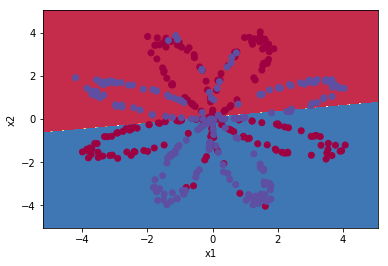

In [121]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)
    
x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1; print(x_min, x_max)
y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1; print(y_min, y_max)
h = 0.01
# Generate a grid of points with distance h between them
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
print(xx.shape)
print(yy.shape)
print(xx[:3, :3])
print(yy[:3, :3])
print(xx.ravel().shape)
# Predict the function value for the whole grid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
print(Z.shape)
Z = Z.reshape(xx.shape)
print(Z.shape)
# Plot the contour and training examples
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
plt.ylabel('x2')
plt.xlabel('x1')
plt.scatter(X[0, :], X[1, :], c=Y, cmap=plt.cm.Spectral)

Accuracy of logistic regression: 47% percentage of correctly labelled datapoints
(400,)
(1, 400)
[[0 0]
 [1 0]
 [1 0]
 [1 0]
 [0 0]]


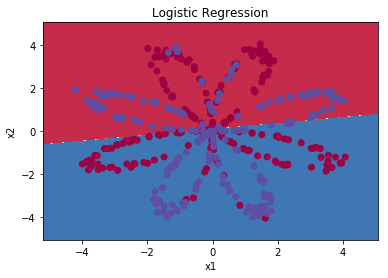

In [130]:
# Plot the decision boundary for logistic regression
plot_decision_boundary(lambda x: clf.predict(x), X, Y)
plt.title('Logistic Regression')

# Print accuracy
LR_predictions = clf.predict(X.T)
print('Accuracy of logistic regression: %d' % float((np.dot(Y, LR_predictions) + np.dot(1-Y, 1-LR_predictions)) / float(Y.size) * 100) + 
     '% ' + 'percentage of correctly labelled datapoints')

print(LR_predictions.shape)
print(Y.shape)
print(np.c_[LR_predictions.reshape(400,1), Y.reshape(400,1)][:5,])

**Expected Output**:

<table style="width:20%">
  <tr>
    <td>**Accuracy**</td>
    <td> 47% </td> 
  </tr>
  
</table>

**Interpretation**: The dataset is not linearly separable, so logistic regression doesn't perform well. Hopefully a neural network will do better. Let's try this now! 

## 4 - Neural Network model

Logistic regression did not work well on the "flower dataset". You are going to train a Neural Network with a single hidden layer.

**Here is our model**:
<img src="data/classification_kiank.png" style="width:600px;height:300px;">

**Mathematically**:

For one example $x^{(i)}$:
$$z^{[1] (i)} =  W^{[1]} x^{(i)} + b^{[1]}\tag{1}$$ 
$$a^{[1] (i)} = \tanh(z^{[1] (i)})\tag{2}$$
$$z^{[2] (i)} = W^{[2]} a^{[1] (i)} + b^{[2]}\tag{3}$$
$$\hat{y}^{(i)} = a^{[2] (i)} = \sigma(z^{ [2] (i)})\tag{4}$$
$$y^{(i)}_{prediction} = \begin{cases} 1 & \mbox{if } a^{[2](i)} > 0.5 \\ 0 & \mbox{otherwise } \end{cases}\tag{5}$$

Given the predictions on all the examples, you can also compute the cost $J$ as follows: 
$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right)  \large  \right) \small \tag{6}$$

**Reminder**: The general methodology to build a Neural Network is to:
    1. Define the neural network structure ( # of input units,  # of hidden units, etc). 
    2. Initialize the model's parameters
    3. Loop:
        - Implement forward propagation
        - Compute loss
        - Implement backward propagation to get the gradients
        - Update parameters (gradient descent)

You often build helper functions to compute steps 1-3 and then merge them into one function we call `nn_model()`. Once you've built `nn_model()` and learnt the right parameters, you can make predictions on new data.

### 4.1 - Defining the neural network structure ####

**Exercise**: Define three variables:
    - n_x: the size of the input layer
    - n_h: the size of the hidden layer (set this to 4) 
    - n_y: the size of the output layer

**Hint**: Use shapes of X and Y to find n_x and n_y. Also, hard code the hidden layer size to be 4.

In [135]:
def layer_sizes(X, Y):
    """
    Arguments:
    X -- input dataset of shape (input size, number of examples)
    Y -- output dataset of shape (output size, number of examples)
    
    Returns:
    n_x -- the size of the input layer
    n_h -- the size of the hidden layer
    n_y -- the size of the output layer
    
    """
    
    n_x = X.shape[0]
    n_h = 4
    n_y = Y.shape[0]
    
    return (n_x, n_h, n_y)

def layer_sizes_test():
    np.random.seed(1)
    X_assess = np.random.randn(5,3)
    Y_assess = np.random.randn(2,3)
    return X_assess, Y_assess

X_assess, Y_assess = layer_sizes_test()
(n_x, n_h, n_y) = layer_sizes(X_assess, Y_assess)
print('The size of the input layer is: n_x = ' + str(n_x))
print('The size of the hidden layer is: n_h = ' + str(n_h))
print('The size of the output layer is: n_y = ' + str(n_y))



The size of the input layer is: n_x = 5
The size of the hidden layer is: n_h = 4
The size of the output layer is: n_y = 2


**Expected Output** (these are not the sizes you will use for your network, they are just used to assess the function you've just coded).

<table style="width:20%">
  <tr>
    <td>**n_x**</td>
    <td> 5 </td> 
  </tr>
  
    <tr>
    <td>**n_h**</td>
    <td> 4 </td> 
  </tr>
  
    <tr>
    <td>**n_y**</td>
    <td> 2 </td> 
  </tr>
  
</table>

### 4.2 - Initialize the model's parameters ####

**Exercise**: Implement the function `initialize_parameters()`.

**Instructions**:
- Make sure your parameters' sizes are right. Refer to the neural network figure above if needed.
- You will initialize the weights matrices with random values. 
    - Use: `np.random.randn(a,b) * 0.01` to randomly initialize a matrix of shape (a,b).
- You will initialize the bias vectors as zeros. 
    - Use: `np.zeros((a,b))` to initialize a matrix of shape (a,b) with zeros.

In [146]:
def initialize_parameters(n_x, n_h, n_y):
    """
    Arguments:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing parameters:
        W1 -- weight matrix for level 1 of shape (n_h, n_x)
        b1 -- bias vector for level 1 of shape (n_h, 1)
        W2 -- weight matrix for level 2 of shape (n_y, n_h)
        b2 -- bias vector for level two of shape (n_y, 1)
    """
    
    W1 = np.random.randn(n_h, n_x)
    b1 = np.zeros(n_h).reshape((n_h,1))
    W2 = np.random.randn(n_y, n_h)
    b2 = np.zeros(n_y).reshape((n_y,1))
    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    params = {'W1': W1,
              'b1': b1,
              'W2': W2,
              'b2': b2}
    return params

def initialize_parameters_test():
    n_x, n_h, n_y = 2, 4, 1
    return n_x, n_h, n_y

n_x, n_h, n_y = initialize_parameters_test()
parameters = initialize_parameters(n_x, n_h, n_y)
#print(parameters)
print('Initializing for parameters: n_x = {0}, n_h = {1}, n_y = {2}'.format(str(n_x), str(n_h), str(n_y)))
print('W1 = ' + str(parameters['W1']))
print('b1 = ' + str(parameters['b1']))
print('W2 = ' + str(parameters['W2']))
print('b2 = ' + str(parameters['b2']))

Initializing for parameters: n_x = 2, n_h = 4, n_y = 1
W1 = [[ 0.86334532 -0.1809203 ]
 [-0.60392063 -1.23005814]
 [ 0.5505375   0.79280687]
 [-0.62353073  0.52057634]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-1.14434139  0.80186103  0.0465673  -0.18656977]]
b2 = [[0.]]


### 4.3 - The Loop ####

**Question**: Implement `forward_propagation()`.

**Instructions**:
- Look above at the mathematical representation of your classifier.
- You can use the function `sigmoid()`. It is built-in (imported) in the notebook.
- You can use the function `np.tanh()`. It is part of the numpy library.
- The steps you have to implement are:
    1. Retrieve each parameter from the dictionary "parameters" (which is the output of `initialize_parameters()`) by using `parameters[".."]`.
    2. Implement Forward Propagation. Compute $Z^{[1]}, A^{[1]}, Z^{[2]}$ and $A^{[2]}$ (the vector of all your predictions on all the examples in the training set).
- Values needed in the backpropagation are stored in "`cache`". The `cache` will be given as an input to the backpropagation function.

In [262]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
sigmoid(np.array([1, -10, 0]))

array([7.31058579e-01, 4.53978687e-05, 5.00000000e-01])

In [273]:
def forward_propagation(X, parameters):
    """
    Arguments:
    X - input data of size (n_x, m)
    parameters -- python dictionary containing initializing parameters
    
    Returns:
    A2 -- The sigmoid output of the second activation layer
    cache -- a dictionary containing Z1, A1, Z2, A2
    """
    
    # Retrieve each parameter from the dictionary "parameters"
    
    W1 = parameters['W1']
    W2 = parameters['W2']
    b1 = parameters['b1']
    b2 = parameters['b2']
    
    # Implement Forward Propagation to calculate A2 (probabilities)
    Z1 = np.dot(W1, X) + b1; #print('Z1.shape: ', Z1.shape)
    A1 = np.tanh(Z1); #print('A1.shape: ', A1.shape)
    Z2 = np.dot(W2, A1) + b2; #print('Z2.shape: ', Z2.shape)
    #A2 = np.tanh(Z2); #print('A2.shape: ', A2.shape)
    A2 = sigmoid(Z2) # tanh() impossible because it gives negative values and log(negative) NaN
    #print('A2: ', A2)
    assert(A2.shape == (1, X.shape[1]))
    
    cache = {"Z1": Z1,
            "A1": A1,
            "Z2": Z2,
            "A2": A2}
    
    return A2, cache

def forward_propagation_test():
    np.random.seed(1)
    X_assess = np.random.randn(2,3); print('X_assess: ', X_assess)
    b1 = np.random.randn(4,1)
    b2 = np.array([[-1.3]])
    
    #parameters = initialize_parameters(n_x = 2, n_h = 4, )
    parameters = {'W1': np.array([[-0.00416758, -0.00056267],
        [-0.02136196,  0.01640271],
        [-0.01793436, -0.00841747],
        [ 0.00502881, -0.01245288]]),
     'W2': np.array([[-0.01057952, -0.00909008,  0.00551454,  0.02292208]]),
     'b1': b1,
     'b2': b2}
    
    return X_assess, parameters

X_assess, parameters = forward_propagation_test()
A2, cache = forward_propagation(X_assess, parameters)

print(np.mean(cache['Z1']), np.mean(cache['A1']), np.mean(cache['Z2']), np.mean(cache['A2']))
print(cache['Z2'])
print(cache['A2'])
print(cache['Z2'][0][0])
print(np.tanh(cache['Z2'][0][0]))

X_assess:  [[ 1.62434536 -0.61175641 -0.52817175]
 [-1.07296862  0.86540763 -2.3015387 ]]
0.26281864019752443 0.09199904522700109 -1.3076660128732143 0.21287768171914198
[[-1.30737426 -1.30844761 -1.30717618]]
[[0.21292656 0.21274673 0.21295976]]
-1.3073742573606946
-0.8636095167784928


In [274]:
s = 'sdfsafre'
print(list(s))
print(set(list(s)))
print(len(set(list(s))))

['s', 'd', 'f', 's', 'a', 'f', 'r', 'e']
{'s', 'e', 'a', 'f', 'r', 'd'}
6


In [275]:
n = 12345
print(n)
solution = list(str(n))
print(solution)


12345
['1', '2', '3', '4', '5']


Now that you have computed $A^{[2]}$ (in the Python variable "`A2`"), which contains $a^{[2](i)}$ for every example, you can compute the cost function as follows:

$$J = - \frac{1}{m} \sum\limits_{i = 1}^{m} \large{(} \small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right) \large{)} \small\tag{13}$$

**Exercise**: Implement `compute_cost()` to compute the value of the cost $J$.

**Instructions**:
- There are many ways to implement the cross-entropy loss. To help you, we give you how we would have implemented
$- \sum\limits_{i=0}^{m}  y^{(i)}\log(a^{[2](i)})$:
```python
logprobs = np.multiply(np.log(A2),Y)
cost = - np.sum(logprobs)                # no need to use a for loop!
```

(you can use either `np.multiply()` and then `np.sum()` or directly `np.dot()`).  
Note that if you use `np.multiply` followed by `np.sum` the end result will be a type `float`, whereas if you use `np.dot`, the result will be a 2D numpy array.  We can use `np.squeeze()` to remove redundant dimensions (in the case of single float, this will be reduced to a zero-dimension array). We can cast the array as a type `float` using `float()`.

In [295]:
def compute_cost(A2, Y):
    """
    Computes the cross-entropy cost given in equation (13)
    
    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    cost -- cross-entropy cost given equation (13)
    """
    #print('*** compute_cost (begin) ***')
    #print('A2: ', A2)
    #print('Y: ', Y)
    m = Y.shape[1] # number of examples
    #print('m: ', m)
    # Compute the cross-entropy cost
    cost = (-1/m) * (np.sum(np.multiply(Y, np.log(A2))) + np.sum(np.multiply(1-Y, np.log(1-A2))))
    #cost = -(1/m) * ((np.dot(Y, np.log(A2).T)) + np.dot(1-Y, np.log(1-A2).T))
    
    cost = float(np.squeeze(cost)) # makes sure cost is the dimension we expect. 
                           # E.g., turns [[17]] into 17
    
    #print('cost: ', cost)
    assert(isinstance(cost, float))
    
    #print('*** END compute_cost (end) ***')
    
    return cost

def compute_cost_test():
    np.random.seed(1)
    Y_assess = (np.random.randn(1,3) > 0)
    A2 = (np.array([[ 0.5002307 ,  0.49985831,  0.50023963]]))
    
    return A2, Y_assess

A2, Y_assess = compute_cost_test()

print('cost = ' + str(compute_cost(A2, Y_assess)))

cost = 0.6930587610394646


**Expected Output**:
<table style="width:20%">
  <tr>
    <td>**cost**</td>
    <td> 0.693058761... </td> 
  </tr>
  
</table>

Using the cache computed during forward propagation, you can now implement backward propagation.

**Question**: Implement the function `backward_propagation()`.

**Instructions**:
Backpropagation is usually the hardest (most mathematical) part in deep learning. To help you, here again is the slide from the lecture on backpropagation. You'll want to use the six equations on the right of this slide, since you are building a vectorized implementation.  

<img src="data/grad_summary.png" style="width:600px;height:300px;">

<!--
$\frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)} } = \frac{1}{m} (a^{[2](i)} - y^{(i)})$

$\frac{\partial \mathcal{J} }{ \partial W_2 } = \frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)} } a^{[1] (i) T} $

$\frac{\partial \mathcal{J} }{ \partial b_2 } = \sum_i{\frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)}}}$

$\frac{\partial \mathcal{J} }{ \partial z_{1}^{(i)} } =  W_2^T \frac{\partial \mathcal{J} }{ \partial z_{2}^{(i)} } * ( 1 - a^{[1] (i) 2}) $

$\frac{\partial \mathcal{J} }{ \partial W_1 } = \frac{\partial \mathcal{J} }{ \partial z_{1}^{(i)} }  X^T $

$\frac{\partial \mathcal{J} _i }{ \partial b_1 } = \sum_i{\frac{\partial \mathcal{J} }{ \partial z_{1}^{(i)}}}$

- Note that $*$ denotes elementwise multiplication.
- The notation you will use is common in deep learning coding:
    - dW1 = $\frac{\partial \mathcal{J} }{ \partial W_1 }$
    - db1 = $\frac{\partial \mathcal{J} }{ \partial b_1 }$
    - dW2 = $\frac{\partial \mathcal{J} }{ \partial W_2 }$
    - db2 = $\frac{\partial \mathcal{J} }{ \partial b_2 }$
    
!-->

- Tips:
    - To compute dZ1 you'll need to compute $g^{[1]'}(Z^{[1]})$. Since $g^{[1]}(.)$ is the tanh activation function, if $a = g^{[1]}(z)$ then $g^{[1]'}(z) = 1-a^2$ (according to definition). So you can compute 
    $g^{[1]'}(Z^{[1]})$ using `(1 - np.power(A1, 2))`.

In [296]:
def backward_propagation(parameters, cache, X, Y):
    """
    Implement the backward propagation using the instructions above.
    
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    
    m = X.shape[1]
    
    # First, retrieve W1 and W2 from the dictionary "parameters".
    W1 = parameters['W1']
    W2 = parameters['W2']
    
    # Retrieve also A1 and A2 from dictionary "cache".
    A1 = cache['A1']
    A2 = cache['A2']
    Z1 = cache['Z1']
    
    # Backward propagation: calculate dW1, db1, dW2, db2
    dZ2 = A2 - Y
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * np.sum(dZ2, axis = 1, keepdims = True)
    dZ1 = np.dot(W2.T, dZ2) * (1 - np.power(np.tanh(Z1), 2))
    dW1 = (1/m) * np.dot(dZ1, X.T)
    db1 = (1/m) * np.sum(dZ1, axis = 1, keepdims = True)
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

# Test function
def backward_propagation_test():
    np.random.seed(1)
    X_assess = np.random.randn(2,3)
    Y_assess = (np.random.randn(1,3) > 0)
    parameters = {
        'W1': np.array(
            [[-0.00416758, -0.00056267],
             [-0.02136196,  0.01640271],
             [-0.01793436, -0.00841747],
             [ 0.00502881, -0.01245288]]),
        'W2': np.array(
            [[-0.01057952, -0.00909008,  0.00551454,  0.02292208]]),
        'b1': np.array(
            [[ 0.],
             [ 0.],
             [ 0.],
             [ 0.]]),
        'b2': np.array([[ 0.]])}
    cache = {
        'A1': np.array(
            [[-0.00616578,  0.0020626 ,  0.00349619],
             [-0.05225116,  0.02725659, -0.02646251],
             [-0.02009721,  0.0036869 ,  0.02883756],
             [ 0.02152675, -0.01385234,  0.02599885]]),
        'A2': np.array(
            [[ 0.5002307 ,  0.49985831,  0.50023963]]),
        'Z1': np.array(
            [[-0.00616586,  0.0020626 ,  0.0034962 ],
             [-0.05229879,  0.02726335, -0.02646869],
             [-0.02009991,  0.00368692,  0.02884556],
             [ 0.02153007, -0.01385322,  0.02600471]]),
        'Z2': np.array([[ 0.00092281, -0.00056678,  0.00095853]])}
    
    return parameters, cache, X_assess, Y_assess

parameters, cache, X_assess, Y_assess = backward_propagation_test() 

grads = backward_propagation(parameters, cache, X_assess, Y_assess)

print('dW1 = ' + str(grads['dW1']))
print('db1 = ' + str(grads['db1']))
print('dW2 = ' + str(grads['dW2']))
print('db2 = ' + str(grads['db2']))

dW1 = [[ 0.00301023 -0.00747267]
 [ 0.00257968 -0.00641288]
 [-0.00156892  0.003893  ]
 [-0.00652037  0.01618243]]
db1 = [[ 0.00176201]
 [ 0.00150995]
 [-0.00091736]
 [-0.00381422]]
dW2 = [[ 0.00078841  0.01765429 -0.00084166 -0.01022527]]
db2 = [[-0.16655712]]


**Expected output**:



<table style="width:80%">
  <tr>
    <td>**dW1**</td>
    <td> [[ 0.00301023 -0.00747267]
 [ 0.00257968 -0.00641288]
 [-0.00156892  0.003893  ]
 [-0.00652037  0.01618243]] </td> 
  </tr>
  
  <tr>
    <td>**db1**</td>
    <td>  [[ 0.00176201]
 [ 0.00150995]
 [-0.00091736]
 [-0.00381422]] </td> 
  </tr>
  
  <tr>
    <td>**dW2**</td>
    <td> [[ 0.00078841  0.01765429 -0.00084166 -0.01022527]] </td> 
  </tr>
  

  <tr>
    <td>**db2**</td>
    <td> [[-0.16655712]] </td> 
  </tr>
  
</table>  

**Question**: Implement the update rule. Use gradient descent. You have to use (dW1, db1, dW2, db2) in order to update (W1, b1, W2, b2).

**General gradient descent rule**: $ \theta = \theta - \alpha \frac{\partial J }{ \partial \theta }$ where $\alpha$ is the learning rate and $\theta$ represents a parameter.

**Illustration**: The gradient descent algorithm with a good learning rate (converging) and a bad learning rate (diverging). Images courtesy of Adam Harley.

<img src="data/sgd.gif" style="width:400;height:400;"> <img src="data/sgd_bad.gif" style="width:400;height:400;">

In [297]:
def update_parameters(parameters, grads, learning_rate = 1.2):
    """
    Updates parameters using the gradient descent update rule given above
    
    Arguments:
    parameters -- python dictionary containing parameters (W1, b1, W2, b2)
    grads -- python dictionary containing your gradients (dW1, d)
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
    
    # Retrieve each parameter from the dictionary "parameters"
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    
    # Retrieve each gradient from the dictionary "grads"
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    
    # Update rule for each parameter
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

def update_parameters_test():
    parameters = {
        'W1': np.array(
            [[-0.00615039,  0.0169021 ],
             [-0.02311792,  0.03137121],
             [-0.0169217 , -0.01752545],
             [ 0.00935436, -0.05018221]]),
        'W2': np.array([[-0.0104319 , -0.04019007,  0.01607211,  0.04440255]]),
        'b1': np.array(
            [[ -8.97523455e-07],
             [  8.15562092e-06],
             [  6.04810633e-07],
             [ -2.54560700e-06]]),
        'b2': np.array([[  9.14954378e-05]])}
    
    grads = {
        'dW1': np.array(
            [[ 0.00023322, -0.00205423],
             [ 0.00082222, -0.00700776],
             [-0.00031831,  0.0028636 ],
             [-0.00092857,  0.00809933]]),
        'dW2': np.array(
            [[ -1.75740039e-05,   3.70231337e-03,  -1.25683095e-03, -2.55715317e-03]]),
        'db1': np.array(
            [[  1.05570087e-07],
             [ -3.81814487e-06],
             [ -1.90155145e-07],
             [  5.46467802e-07]]),
        'db2': np.array([[ -1.08923140e-05]])}
    
    return parameters, grads

parameters, grads = update_parameters_test()

parameters = update_parameters(parameters, grads)

print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.05990141]]
b1 = [[-1.02420756e-06]
 [ 1.27373948e-05]
 [ 8.32996807e-07]
 [-3.20136836e-06]]
W2 = [[-0.01041081 -0.04463285  0.01758031  0.04747113]]
b2 = [[0.00010457]]


**Expected Output**:


<table style="width:80%">
  <tr>
    <td>**W1**</td>
    <td> [[-0.00643025  0.01936718]
 [-0.02410458  0.03978052]
 [-0.01653973 -0.02096177]
 [ 0.01046864 -0.05990141]]</td> 
  </tr>
  
  <tr>
    <td>**b1**</td>
    <td> [[ -1.02420756e-06]
 [  1.27373948e-05]
 [  8.32996807e-07]
 [ -3.20136836e-06]]</td> 
  </tr>
  
  <tr>
    <td>**W2**</td>
    <td> [[-0.01041081 -0.04463285  0.01758031  0.04747113]] </td> 
  </tr>
  

  <tr>
    <td>**b2**</td>
    <td> [[ 0.00010457]] </td> 
  </tr>
  
</table>    

### 4.4 - Integrate parts 4.1, 4.2 and 4.3 in nn_model() ####

**Question**: Build your neural network model in `nn_model()`.

**Instructions**: The neural network model has to use the previous functions in the right order.

X_assess:  [[ 1.62434536 -0.61175641 -0.52817175]
 [-1.07296862  0.86540763 -2.3015387 ]]
Y_assess:  [[ True False  True]]
Cost after iteration 0: 0.8520618815588438
Cost after iteration 1000: 0.0002761711285039622
Cost after iteration 2000: 0.00013794512323285512
Cost after iteration 3000: 9.188936084692428e-05
Cost after iteration 4000: 6.887382585498581e-05
Cost after iteration 5000: 5.507092623272787e-05
Cost after iteration 6000: 4.58726363479661e-05
Cost after iteration 7000: 3.930466895536471e-05
Cost after iteration 8000: 3.4380160139234385e-05
Cost after iteration 9000: 3.05509960715568e-05
W1 = [[ 1.89013628  0.18709321]
 [ 0.23798491 -2.03597592]
 [-1.04316703  1.41958912]
 [ 0.62435397 -1.611304  ]]
b1 = [[-0.14824489]
 [-0.1398845 ]
 [ 0.16640247]
 [-0.32055131]]
W2 = [[ 0.5559344   2.87672606 -3.66654836  3.9427129 ]]
b2 = [[0.39293102]]


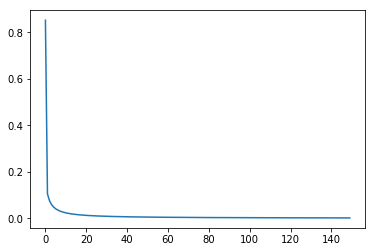

In [319]:
def nn_model(X, Y, n_h, num_iterations = 10000, print_cost = False):
    """
    Arguments:
    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    costs - vector of costs (for plotting)
    """
    
    #print('Y: ', Y)
    #Y = Y * 1
    #print('Y: ', Y)
    
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]; #print('nn_model - n_x:', n_x)
    n_y = layer_sizes(X, Y)[2]; #print('nn_model - n_y:', n_y)
    
    # Initialize parameters
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    # Loop gradient descent
    
    costs = []
    
    for i in range(0, num_iterations):
        #print('Iteration: ', i)
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A2, cache = forward_propagation(X, parameters)
        #print('A2: ', A2)
        #print('cache: ', cache)
        
        # Cost function. Inputs: "A2, Y". Outputs: "cost".
        cost = compute_cost(A2, Y)
        costs.append(cost)
        #print('cost: ', cost)
        
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs = "grads"
        grads = backward_propagation(parameters, cache, X, Y)
        #print('grads: ', grads)
        # Gradient descent parameters update. Inputs: "parameters, grads". Outputs: "parameters".
        parameters = update_parameters(parameters, grads)
        #print('updated parametes: ', parameters)
        # Print the cost every 1000 iterations
        if print_cost and i%1000 == 0:
            print("Cost after iteration {0}: {1}".format(i, cost))
        #print('********************')
    
    return parameters, costs
        
def nn_model_test():
    
    np.random.seed(1)
    X_assess = np.random.randn(2,3)
    Y_assess = (np.random.randn(1,3) > 0)
    
    return X_assess, Y_assess

X_assess, Y_assess = nn_model_test()
print('X_assess: ', X_assess)
print('Y_assess: ', Y_assess)
parameters, costs = nn_model(X_assess, Y_assess, 4, num_iterations= 10000, print_cost= True)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

#print(costs)
plt.plot(list(np.arange(0, len(costs), 1)[:150]), costs[:150])
        
        
        
        

**Expected Output**:

<table style="width:90%">

<tr> 
    <td> 
        **cost after iteration 0**
    </td>
    <td> 
        0.692739
    </td>
</tr>

<tr> 
    <td> 
        <center> $\vdots$ </center>
    </td>
    <td> 
        <center> $\vdots$ </center>
    </td>
</tr>

  <tr>
    <td>**W1**</td>
    <td> [[-0.65848169  1.21866811]
 [-0.76204273  1.39377573]
 [ 0.5792005  -1.10397703]
 [ 0.76773391 -1.41477129]]</td> 
  </tr>
  
  <tr>
    <td>**b1**</td>
    <td> [[ 0.287592  ]
 [ 0.3511264 ]
 [-0.2431246 ]
 [-0.35772805]] </td> 
  </tr>
  
  <tr>
    <td>**W2**</td>
    <td> [[-2.45566237 -3.27042274  2.00784958  3.36773273]] </td> 
  </tr>
  

  <tr>
    <td>**b2**</td>
    <td> [[ 0.20459656]] </td> 
  </tr>
  

### 4.5 Predictions

**Question**: Use your model to predict by building predict().
Use forward propagation to predict results.

**Reminder**: predictions = $y_{prediction} = \mathbb 1 \text{{activation > 0.5}} = \begin{cases}
      1 & \text{if}\ activation > 0.5 \\
      0 & \text{otherwise}
    \end{cases}$  
    
As an example, if you would like to set the entries of a matrix X to 0 and 1 based on a threshold you would do: ```X_new = (X > threshold)```

In [320]:
def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    A2, cache = forward_propagation(X, parameters)
    predictions = (A2 > 0.5)
    
    return predictions

def predict_test():
    np.random.seed(10)
    X_assess = np.random.randn(2,3)
    parameters = {
        'W1': np.array(
            [[-0.00615039,  0.0169021 ],
             [-0.02311792,  0.03137121],
             [-0.0169217 , -0.01752545],
             [ 0.00935436, -0.05018221]]),
        'W2': np.array([[-0.0104319 , -0.04019007,  0.01607211,  0.04440255]]),
        'b1': np.array(
            [[ -8.97523455e-07],
             [  8.15562092e-06],
             [  6.04810633e-07],
             [ -2.54560700e-06]]),
        'b2': np.array([[  9.14954378e-05]])}
    return parameters, X_assess

parameters, X_assess = predict_test()
#print('init - parameters:', parameters)
predictions = predict(parameters, X_assess)
print('predictions mean = ' + str(np.mean(predictions)))

predictions mean = 0.6666666666666666


**Expected Output**: 


<table style="width:40%">
  <tr>
    <td>**predictions mean**</td>
    <td> 0.666666666667 </td> 
  </tr>
  
</table>

It is time to run the model and see how it performs on a planar dataset. Run the following code to test your model with a single hidden layer of $n_h$ hidden units.

Cost after iteration 0: 0.6993291286318691
Cost after iteration 1000: 0.07331075903624043
Cost after iteration 2000: 0.05718476446668172
Cost after iteration 3000: 0.05135527453581951
Cost after iteration 4000: 0.054781050601363325
Cost after iteration 5000: 0.049834086062124965
Cost after iteration 6000: 0.04803252353210644
Cost after iteration 7000: 0.3394335861379637
Cost after iteration 8000: 0.04662705046960269
Cost after iteration 9000: 0.0443257608884627


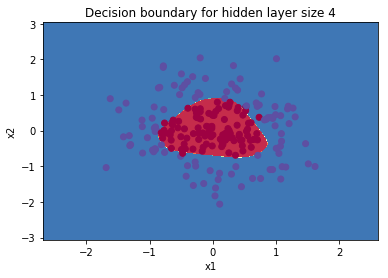

In [371]:
# Build a model on our data (colored dots ;) ) with a n_h-dimensional hidden layer
parameters, costs = nn_model(X, Y, n_h = 4, num_iterations=10000, print_cost= True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision boundary for hidden layer size " + str(4))

In [322]:
# Print accuracy
predictions = predict(parameters, X)
print('Accuracy: %d' % float((np.dot(Y, predictions.T) + np.dot(1-Y, 1-predictions.T)) / float(Y.size) * 100) + '%')
#print(predictions)

Accuracy: 91%


**Expected Output**: 

<table style="width:15%">
  <tr>
    <td>**Accuracy**</td>
    <td> 90% </td> 
  </tr>
</table>

Accuracy is really high compared to Logistic Regression. The model has learnt the leaf patterns of the flower! Neural networks are able to learn even highly non-linear decision boundaries, unlike logistic regression. 

Now, let's try out several hidden layer sizes.

### 4.6 - Tuning hidden layer size (optional/ungraded exercise) ###

Run the following code. It may take 1-2 minutes. You will observe different behaviors of the model for various hidden layer sizes.

Accuracy for 1 hidden units: 65.5 %
Accuracy for 2 hidden units: 80.5 %
Accuracy for 3 hidden units: 98.5 %
Accuracy for 4 hidden units: 98.5 %
Accuracy for 5 hidden units: 99.5 %
Accuracy for 20 hidden units: 100.0 %
Accuracy for 50 hidden units: 100.0 %


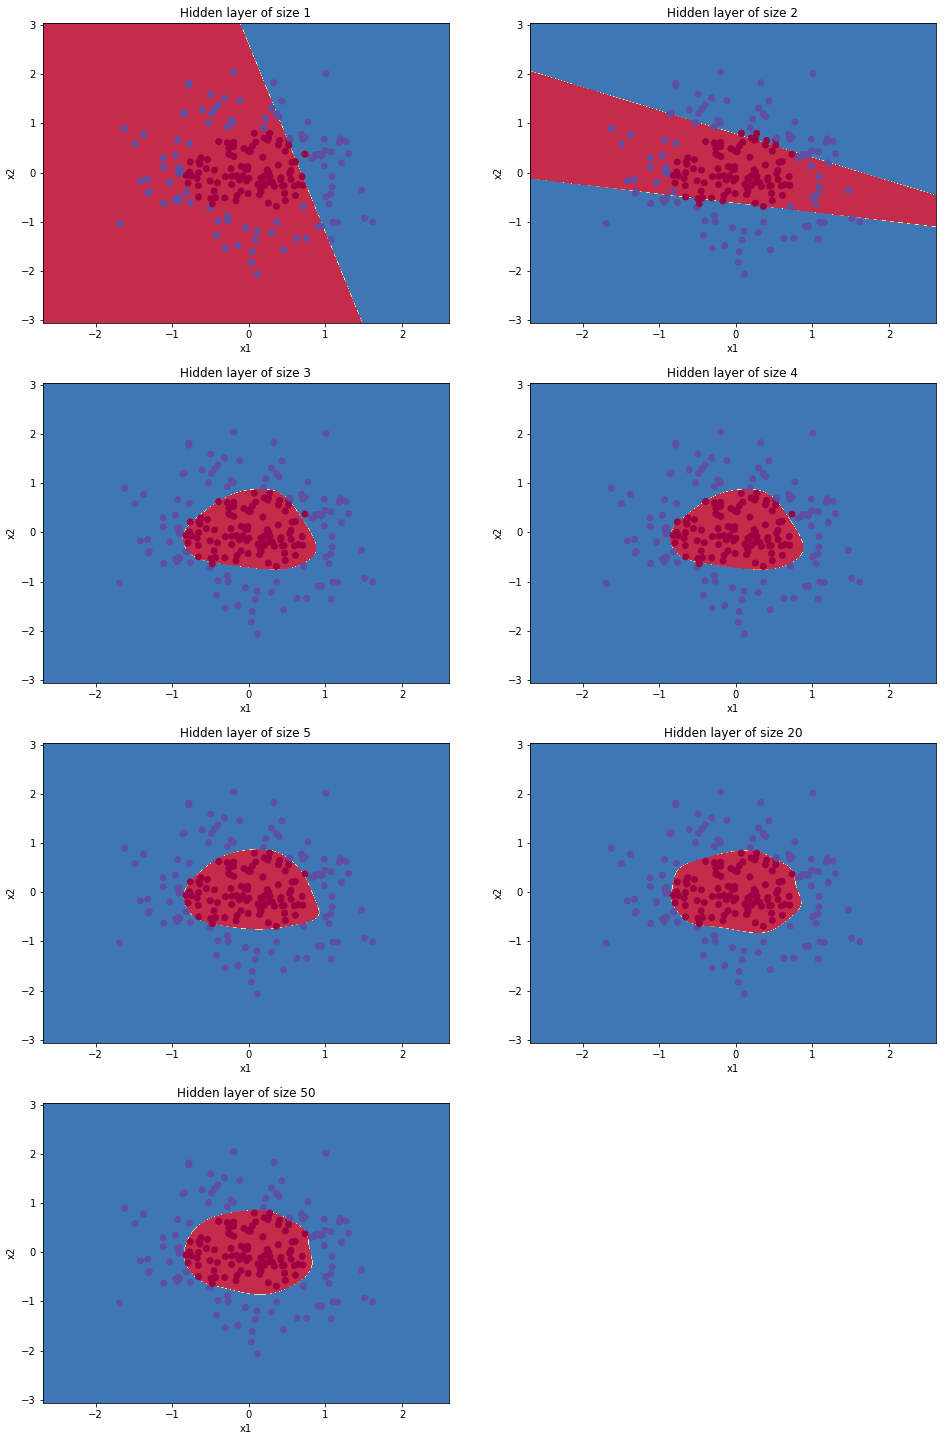

In [372]:
plt.figure(figsize=(16,32))
hidden_layer_sizes = [1,2,3,4,5,20,50]
for i, n_h in enumerate(hidden_layer_sizes):
    plt.subplot(5,2,i+1)
    plt.title('Hidden layer of size %d' % n_h)
    parameters, costs = nn_model(X, Y, n_h, num_iterations=5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y, predictions.T) + np.dot(1-Y, 1-predictions.T))/ float(Y.size)) * 100
    print('Accuracy for {} hidden units: {} %'.format(n_h, accuracy))

**Optional questions**:

**Note**: Remember to submit the assignment by clicking the blue "Submit Assignment" button at the upper-right. 

Some optional/ungraded questions that you can explore if you wish: 
- What happens when you change the tanh activation for a sigmoid activation or a ReLU activation?
- Play with the learning_rate. What happens?
- What if we change the dataset? (See part 5 below!)

<font color='blue'>
**You've learnt to:**
- Build a complete neural network with a hidden layer
- Make a good use of a non-linear unit
- Implemented forward propagation and backpropagation, and trained a neural network
- See the impact of varying the hidden layer size, including overfitting.

## 5) Performance on other datasets
If you want, you can rerun the whole notebook (minus the dataset part) for each of the following datasets.

In [329]:
def load_extra_datasets():
    N = 200
    noisy_circles = sklearn.datasets.make_circles(n_samples = N, factor = 0.5, noise = 0.3)
    noisy_moons = sklearn.datasets.make_moons(n_samples=N, noise=0.2)
    blobs = sklearn.datasets.make_blobs(n_samples = N, random_state = 5, n_features=2, centers=6)
    gaussian_quantiles = sklearn.datasets.make_gaussian_quantiles(mean = None, cov = 0.5, n_samples = N, n_features=2, n_classes=2, shuffle=True, random_state=None)
    no_structure = np.random.rand(N, 2), np.random.rand(N,2)
    
    return noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure

0
noisy_circles
1
gaussian_quantiles
2
blobs
3
noisy_moons


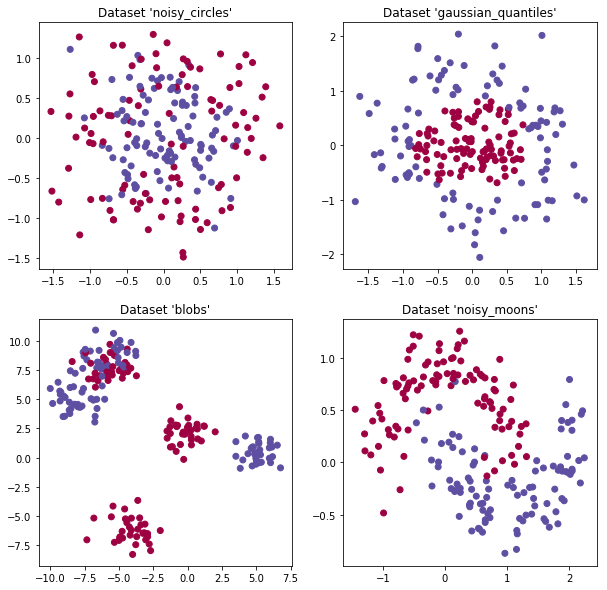

In [370]:
# Datasets
noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure = load_extra_datasets()

datasets = {"noisy_circles": noisy_circles,
            "noisy_moons": noisy_moons,
            "blobs": blobs,
            "gaussian_quantiles": gaussian_quantiles}

plt.figure(figsize = (10,10))
for i, dataset in enumerate(datasets):
    print(i)
    print(dataset)
    #print(datasets[data][0].shape)
    #print(datasets[data][1].shape)
    X, Y = datasets[dataset]
    X, Y = X.T, Y.reshape(1, Y.shape[0])
    
    if dataset == "blobs":
        Y = Y%2
    
    plt.subplot(2,2,i+1)
    plt.scatter(X[0, :], X[1, :], c = Y, cmap = plt.cm.Spectral)
    plt.title("Dataset '{}'".format(dataset))
    

dataset = 'gaussian_quantiles' 
X, Y = datasets[dataset]
X, Y = X.T, Y.reshape(1, Y.shape[0])
if dataset == 'blobs':
    Y = Y%2
    
    
#for i, data in enumerate([noisy_circles, noisy_moons, blobs, gaussian_quantiles, no_structure]):
#    print(i)
#    print(data[0].shape)
#    print(data[1].shape)

In [384]:
x = np.array([1,23,3,4,5,6,7])
y = np.array([1,2,3,4,5,6,7])
m = x.shape[0]; print(m)
print((1/m)*np.sum(x))
print(np.mean(x))
print((1/m)*np.sum(y))
print(np.mean(y))
print((1/m)*np.sum(x/y))
print(np.mean(x/y))
print(np.mean(x)/np.mean(y))
print(np.sum(x)/np.sum(y))


7
7.0
7.0
4.0
4.0
2.5
2.5
1.75
1.75


In [391]:
import pandas as pd
df1 = pd.DataFrame(np.arange(12.).reshape((3, 4)),
                           columns=list('abcd'))
print(df1)
print(df1.loc[1, 'c'])
print(df1.loc[1, :])
print(df1.loc[:,'c'])

     a    b     c     d
0  0.0  1.0   2.0   3.0
1  4.0  5.0   6.0   7.0
2  8.0  9.0  10.0  11.0
6.0
a    4.0
b    5.0
c    6.0
d    7.0
Name: 1, dtype: float64
0     2.0
1     6.0
2    10.0
Name: c, dtype: float64
